## Clasificación de imágenes

Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9. Son imágenes de 8x8, es decir 64 pixeles que representan la escala de blanco a negro de una imagen que refleja un dígito del 0 al 9. Queremos que nuestro clasificador nos diga qué número es.

In [2]:
from sklearn.datasets import load_digits

digits = load_digits() # 8x8 = 64 pixels
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
# Mostramos el tamaño de las imágenes
print("Image Data Shape" , digits.data.shape)
# Y el de la clase
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [4]:
import pandas as pd

df = pd.DataFrame(data= digits['data'])
df['target'] = digits['target']
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [5]:
df.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [6]:
print(digits.data[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


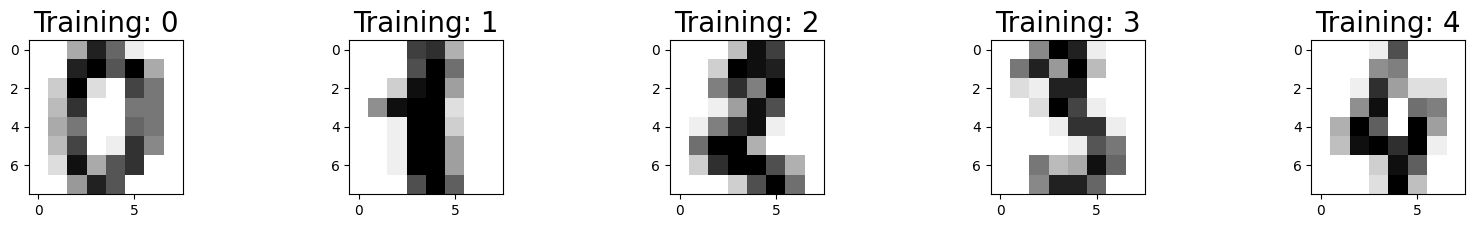

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary')
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

Separaremos los datos en conjuntos de train y test.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size = 0.25,
                                                   random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
logisticRegr.score(x_test, y_test)

0.9533333333333334

Wow, no está nada mal. Un 95% de acierto.

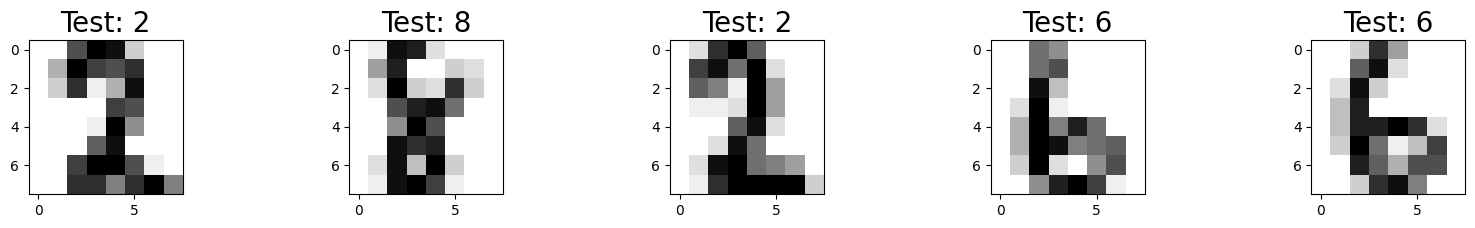

In [19]:
plt.figure(figsize=(20,2))

for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.title('Test: ' + str(label), fontsize = 20)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary');

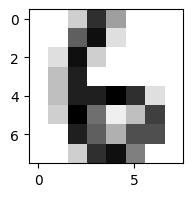

In [52]:
indice = 4

ejemplo = x_test[indice].copy()

plt.figure(figsize=(5,2))
plt.imshow(np.reshape(ejemplo, (8,8)), cmap='binary');

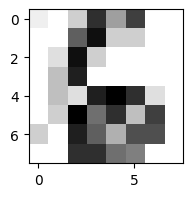

In [64]:
# Cambiad algún pixel a ver qué pasa

pixel = np.random.randint(0, 64)
ejemplo[pixel] = np.random.randint(0, max(ejemplo))

plt.figure(figsize=(5,2))
plt.imshow(np.reshape(ejemplo, (8,8)), cmap='binary');

In [65]:
logisticRegr.predict(ejemplo.reshape(1,64))

array([6])

In [66]:
y_test[indice]

np.int64(6)

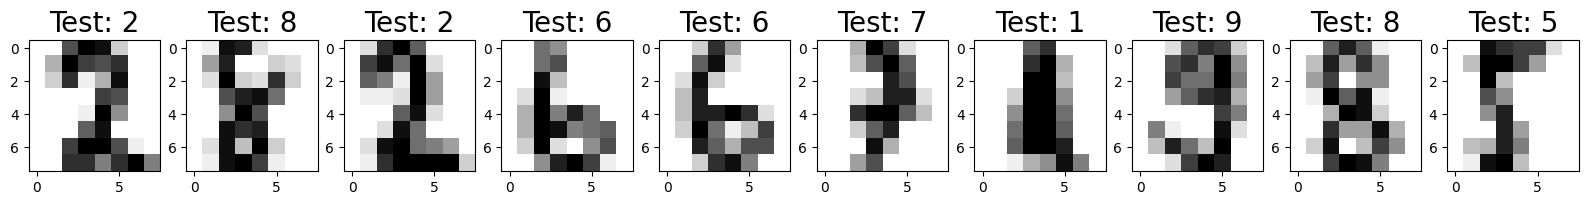

In [67]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.title('Test: ' + str(label), fontsize = 20)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary');

In [68]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [69]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

¿Y con qué probabilidad acierta cuando dice que pertenecen a una categoría?

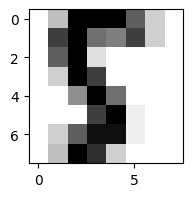

In [110]:
indice = 100

ejemplo = x_test[indice].copy()

plt.figure(figsize=(5,2))
plt.imshow(np.reshape(ejemplo, (8,8)), cmap='binary');

In [111]:
lista_probs = np.round(logisticRegr.predict_proba(ejemplo.reshape(1,64))[0], 4)

lista_probs[y_test[indice]]

np.float64(1.0)

Probabilidad asignada 1.0


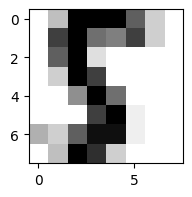

In [112]:
# Cambiad algún pixel a ver qué pasa

pixel = np.random.randint(0, 64)
ejemplo[pixel] = np.random.randint(0, max(ejemplo))

lista_probs = np.round(logisticRegr.predict_proba(ejemplo.reshape(1,64))[0], 4)

print(f"Probabilidad asignada {lista_probs[y_test[indice]]}")

plt.figure(figsize=(5,2))
plt.imshow(np.reshape(ejemplo, (8,8)), cmap='binary');

### Matriz de confusión

In [113]:
import sklearn.metrics as metrics

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 118.72222222222216, 'Predicted label')

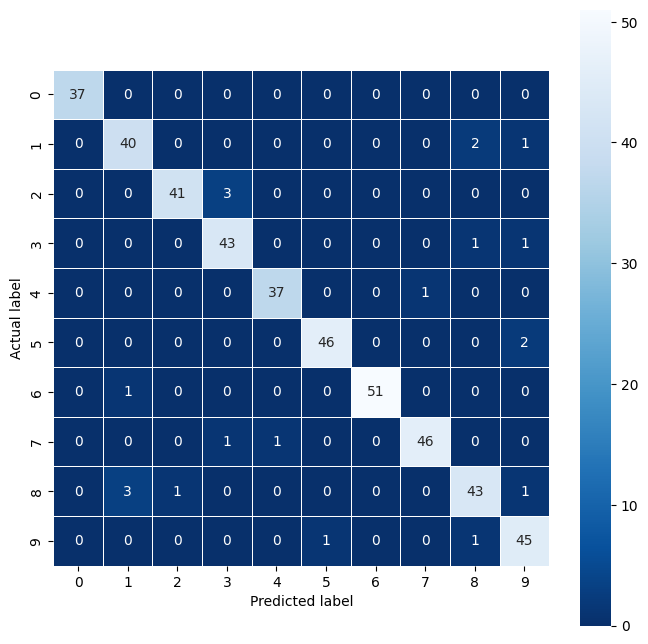

In [117]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

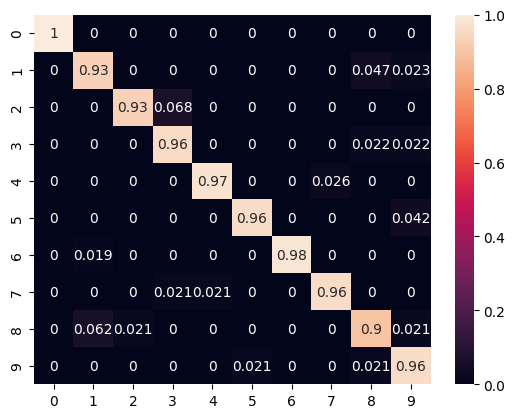

In [118]:
sns.heatmap(metrics.confusion_matrix(y_test, predictions, normalize='true'), annot=True);

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

